In [1]:
import pandas as pd

# Read the CSV file, skipping the first row
df = pd.read_csv("SYB66_310_202310_Carbon Dioxide Emission Estimates.csv", encoding='latin1', skiprows=1)

# Get the column names from the DataFrame
columns = df.columns

# Print the original column names
print("Original column names:")
print(columns)

Original column names:
Index(['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value',
       'Footnotes', 'Source'],
      dtype='object')


In [2]:
# Rename the 'Region/Country/Area' column to 'Region/Area'
data = df.rename(columns={'Region/Country/Area': 'Region/Area'})

# Rename the 'Unnamed: 1' column to 'Country'
data = df.rename(columns={'Unnamed: 1': 'Country'})

# Print the updated column names
print("Updated column names:")

# Display the updated column names after the first renaming
print(data.columns)

Updated column names:
Index(['Region/Country/Area', 'Country', 'Year', 'Series', 'Value',
       'Footnotes', 'Source'],
      dtype='object')


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
print("Missing Values:")
print(missing_values)

Missing Values:
Region/Country/Area       0
Country                   0
Year                      0
Series                    0
Value                     0
Footnotes              2008
Source                    0
dtype: int64


In [4]:
# Drop the 'Footnotes' column
data_cleaned = data.drop(columns=['Footnotes'])

# Get an overview of the data by displaying the first few rows of the dataset
data_cleaned.head()

,Region/Country/Area,Country,Year,Series,Value,Source
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,"4,524","International Energy Agency, IEA World Energy ..."
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,"7,145","International Energy Agency, IEA World Energy ..."
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,"3,980","International Energy Agency, IEA World Energy ..."
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,"4,074","International Energy Agency, IEA World Energy ..."
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,"3,975","International Energy Agency, IEA World Energy ..."


In [5]:
# Display unique values in the 'Value' column
print(data_cleaned['Value'].unique())

['4,524' '7,145' '3,980' ... '13,300' '12,525' '10,647']


In [6]:
# Remove commas and convert 'Value' column to numeric
data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'].str.replace(',', ''), errors='coerce')

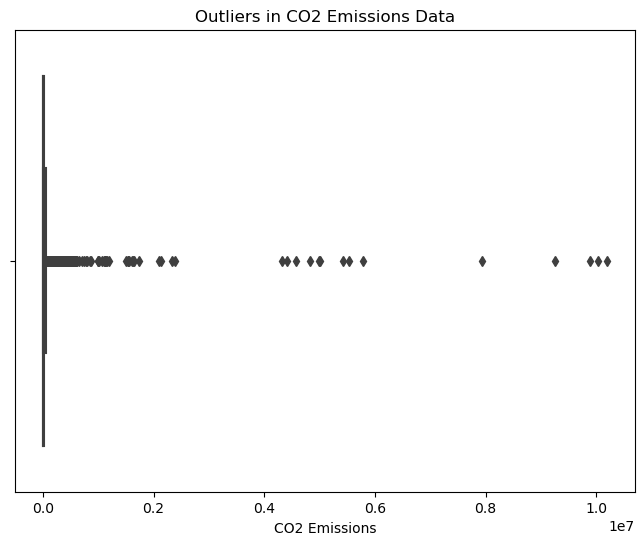

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for outliers in CO2 emissions data
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['Value'])
plt.title("Outliers in CO2 Emissions Data")
plt.xlabel("CO2 Emissions")
plt.show()

In [8]:
# Calculate the interquartile range (IQR)
Q1 = data_cleaned['Value'].quantile(0.25)
Q3 = data_cleaned['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the bounds
outliers = data_cleaned[(data_cleaned['Value'] < lower_bound) | (data_cleaned['Value'] > upper_bound)]

# Display the numerical values of outliers
print("Outlier values:")
print(outliers['Value'])

Outlier values:
18       78045.0
19       96452.0
20      131690.0
21      138496.0
22      143569.0
          ...   
2203    132486.0
2204    169006.0
2205    239067.0
2206    287820.0
2207    297522.0
Name: Value, Length: 365, dtype: float64


In [9]:
# 1. What are the columns in the dataset, and what do they represent?

# Dictionary of column descriptions
column_descriptions = {
    "Region/Area": "The region, or area",
    "Country": "The countries in the dataset",
    "Year": "The year of the data",
    "Series": "The type of data series",
    "Value": "The numerical value of the data",
    "Source": "The source of the data",
}

# Print column names and descriptions
print("\nColumn names and descriptions:")

# Iterate through each column in the DataFrame
for column in data_cleaned.columns:

    # Retrieve the description from the dictionary, or use a default value if not found
    description = column_descriptions.get(column, 'No description available')

    # Print the column name and its corresponding description
    print(f"{column}: {description}")


Column names and descriptions:
Region/Country/Area: No description available
Country: The countries in the dataset
Year: The year of the data
Series: The type of data series
Value: The numerical value of the data
Source: The source of the data


In [10]:
# 2. How many countries or regions are included in the dataset?

# Count the number of unique countries or regions in the "Country" column
num_countries_regions = data_cleaned["Country"].nunique()

# Print the result
print(f"Number of countries or regions: {num_countries_regions}")

Number of countries or regions: 149


In [11]:
# 3. What is the time period covered by the dataset (years)?

# Find the minimum and maximum years in the dataset
min_year = data_cleaned["Year"].min()
max_year = data_cleaned["Year"].max()

# Print the time period covered by the dataset
print(f"Time period covered: {min_year} to {max_year}")

Time period covered: 1975 to 2020


In [12]:
# 4. Which countries or regions have the highest total CO2 emissions in the most recent year available?

# Find the most recent year in the dataset
latest_year = data_cleaned["Year"].max()

# Filter the dataset for data from the most recent year
latest_year_data = data_cleaned[data_cleaned["Year"] == latest_year]

# Sort the data by CO2 emissions in descending order
top_emitting_countries = latest_year_data.sort_values(by="Value", ascending=False)

# Print the header for the output
print("Countries with highest CO2 emissions in the most recent year:")

# Print the columns "Country" and "Value" for the top emitting countries
print(top_emitting_countries[["Country", "Value"]])

Countries with highest CO2 emissions in the most recent year:
                       Country       Value
355                      China  10190639.0
2147  United States of America   4324698.0
929                      India   2135190.0
1717        Russian Federation   1562930.0
1057                     Japan    998658.0
...                        ...         ...
701                   Ethiopia         0.1
1739                    Rwanda         0.1
2079                    Uganda         0.1
1249                Madagascar         0.1
551     Dem. Rep. of the Congo         0.0

[298 rows x 2 columns]


In [13]:
# 5. What are the top five countries or regions with the lowest total CO2 emissions in the most recent year available?

# Check the data type of the 'Value' column
if data_cleaned['Value'].dtype == 'O':  # 'O' stands for object, which is the data type for strings
    # Convert 'Value' column to numeric only if it contains strings
    data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'].str.replace(',', ''), errors='coerce')

# Find the most recent year in the dataset
latest_year = data_cleaned['Year'].max()

# Filter the dataset for the most recent year
latest_year_data = data_cleaned[data_cleaned['Year'] == latest_year]

# Sort the data by CO2 emissions in ascending order to get the lowest emissions first
lowest_emitting_countries = latest_year_data.sort_values(by='Value')

# Display the top five countries or regions with the lowest total CO2 emissions
top_lowest_emitting = lowest_emitting_countries[['Country', 'Value']].head(5)

# Print the result
print("Top five countries or regions with the lowest CO2 emissions in the most recent year:")
print(top_lowest_emitting)

Top five countries or regions with the lowest CO2 emissions in the most recent year:
                     Country  Value
551   Dem. Rep. of the Congo    0.0
1249              Madagascar    0.1
1739                  Rwanda    0.1
701                 Ethiopia    0.1
1479                   Niger    0.1


In [14]:
# 6. Which year had the highest global CO2 emissions?

# Find the year with the highest global CO2 emissions
max_emission_year = data_cleaned.groupby('Year')['Value'].sum().idxmax()

# Print the result
print(f"The year with the highest global CO2 emissions: {max_emission_year}")

The year with the highest global CO2 emissions: 2018


In [15]:
# 7. Which year had the lowest global CO2 emissions?

# Find the year with the lowest global CO2 emissions
min_emission_year = data_cleaned.groupby('Year')['Value'].sum().idxmin()

# Print the result
print(f"The year with the lowest global CO2 emissions: {min_emission_year}")

The year with the lowest global CO2 emissions: 1975


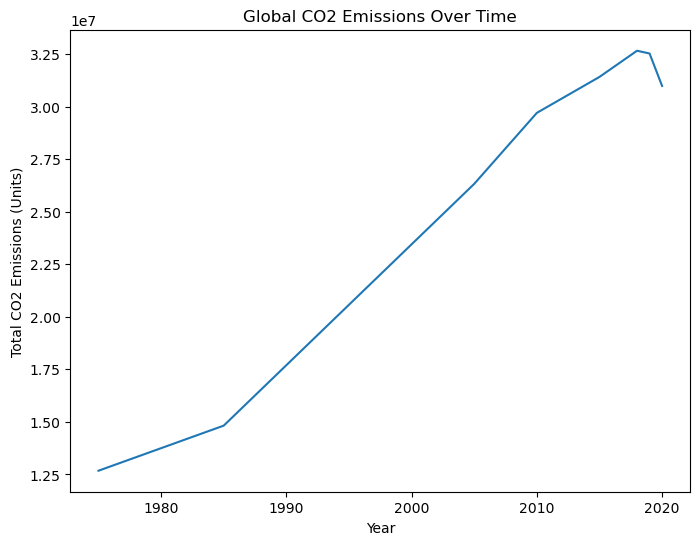

In [39]:
# 8. How have global CO2 emissions changed over the years?

# Group the data by year and sum CO2 emissions for each year
global_emissions_over_time = data_cleaned.groupby("Year")["Value"].sum()

# Create a line plot for global CO2 emissions over time
plt.figure(figsize=(8, 6))
sns.lineplot(x=global_emissions_over_time.index, y=global_emissions_over_time.values)

# Add title and axis labels for the plot
plt.title("Global CO2 Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Total CO2 Emissions (Units)")

# Display the plot
plt.show()

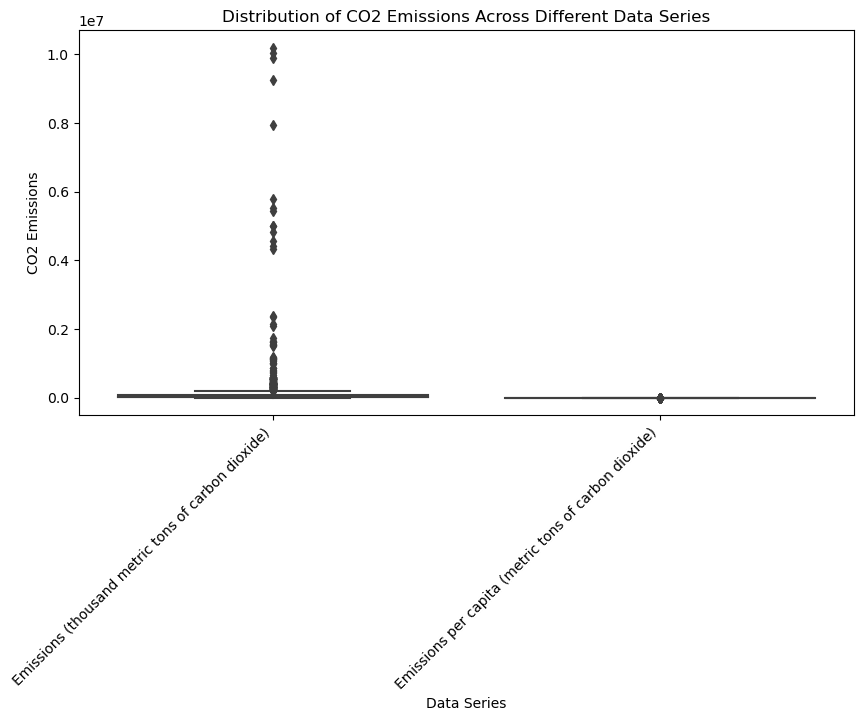

In [17]:
# 9. How does the distribution of CO2 emissions vary across different data series (Series column)?

# Boxplot to visualize the distribution of CO2 emissions across different data series
plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
sns.boxplot(x='Series', y='Value', data=data_cleaned)  # Create a boxplot using seaborn
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Distribution of CO2 Emissions Across Different Data Series")  # Add a title to the plot
plt.xlabel("Data Series")  # Label for the x-axis
plt.ylabel("CO2 Emissions")  # Label for the y-axis
plt.show()  # Display the plot

In [18]:
# 10. What is the average annual change in CO2 emissions for each country or region over the entire time period covered by the dataset?

# Convert 'Value' column to numeric
data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'], errors='coerce')

# Group the data by country and year, summing CO2 emissions for each combination
country_emissions_over_time = data_cleaned.groupby(["Country", "Year"])["Value"].sum()

# Calculate the annual change in emissions for each country
annual_change = country_emissions_over_time.groupby("Country").diff()

# Calculate the average annual change for each country
average_annual_change = annual_change.groupby("Country").mean()

# Print the result
print("Average annual change in CO2 emissions for each country:")
print(average_annual_change)

Average annual change in CO2 emissions for each country:
Country
Albania                        -144.657143
Algeria                       17415.757143
Angola                         2020.028571
Argentina                      9309.714286
Armenia                         460.340000
                                  ...     
Venezuela (Boliv. Rep. of)     -237.771429
Viet Nam                      39681.228571
Yemen                           987.000000
Zambia                          515.928571
Zimbabwe                        308.057143
Name: Value, Length: 149, dtype: float64


In [19]:
# 11. What is the proportion of CO2 emissions contributed by the top five emitting countries or regions in the most recent year available?

# Convert 'Value' column to numeric
data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'], errors='coerce')

# Find the most recent year in the dataset
latest_year = data_cleaned['Year'].max()

# Filter the dataset for the most recent year
latest_year_data = data_cleaned[data_cleaned['Year'] == latest_year]

# Sort the data by CO2 emissions in descending order to get the top emitters first
top_emitting_countries = latest_year_data.sort_values(by='Value', ascending=False)

# Select the top five emitting countries or regions
top_five_emitters = top_emitting_countries.head(5)

# Calculate the total CO2 emissions for the top five emitters
total_emissions_top_five = top_five_emitters['Value'].sum()

# Calculate the proportion of total CO2 emissions contributed by the top five emitters
total_emissions_all = latest_year_data['Value'].sum()
proportion_top_five = total_emissions_top_five / total_emissions_all

# Print the result
print(f"The proportion of CO2 emissions contributed by the top five emitters in {latest_year}: {proportion_top_five:.2%}")

The proportion of CO2 emissions contributed by the top five emitters in 2020: 62.02%


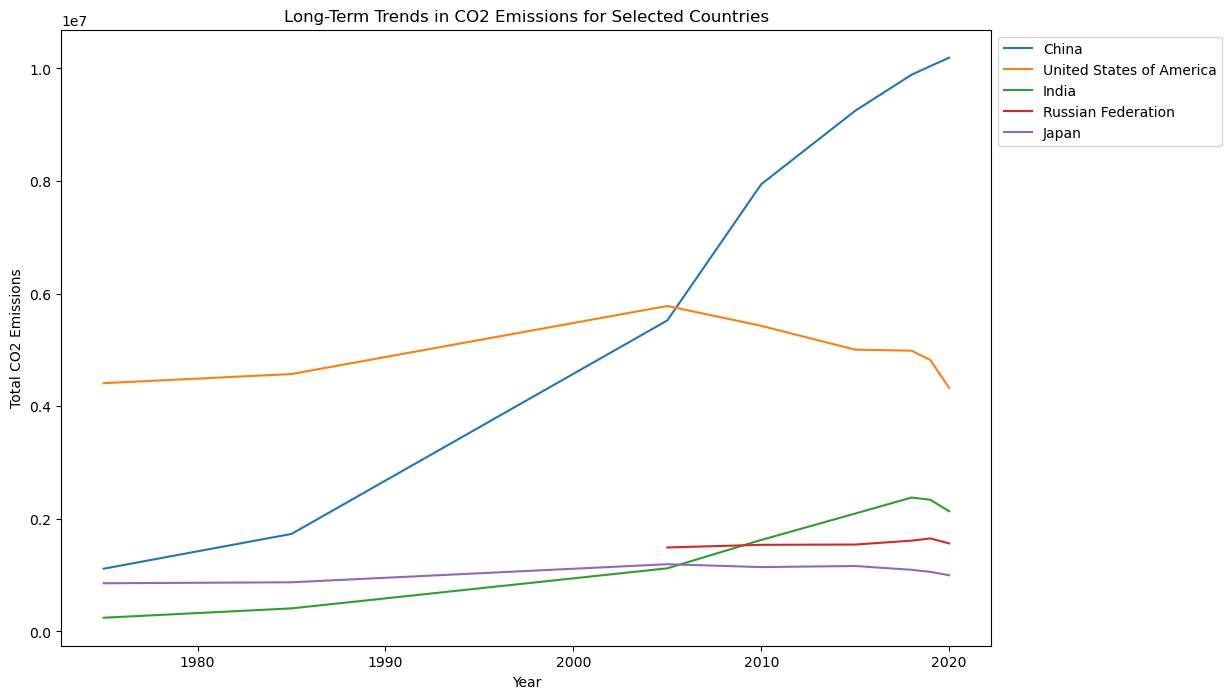

In [20]:
# 12. What are the long-term trends or patterns in CO2 emissions for the countries with the highest CO2 emissions over the entire time period covered by the dataset?

# Check the data type of the 'Value' column
if data_cleaned['Value'].dtype == 'O':  # 'O' represents object (likely string) type
    # Convert 'Value' column to numeric (assuming it contains commas)
    data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'].str.replace(',', ''), errors='coerce')

# Group the data by country and year, summing CO2 emissions for each combination
country_emissions_over_time = data_cleaned.groupby(["Country", "Year"])["Value"].sum().reset_index()

# Plot long-term trends for the specified countries
plt.figure(figsize=(12, 8))
selected_countries = ["China", "United States of America", "India", "Russian Federation", "Japan"]
for country in selected_countries:
    # Extract data for the current country
    country_data = country_emissions_over_time[country_emissions_over_time['Country'] == country]
    
    # Plot the data for the current country
    plt.plot(country_data['Year'], country_data['Value'], label=country)

# Add labels and title to the plot
plt.title("Long-Term Trends in CO2 Emissions for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Total CO2 Emissions")

# Add legend to identify countries
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# Yann's Now


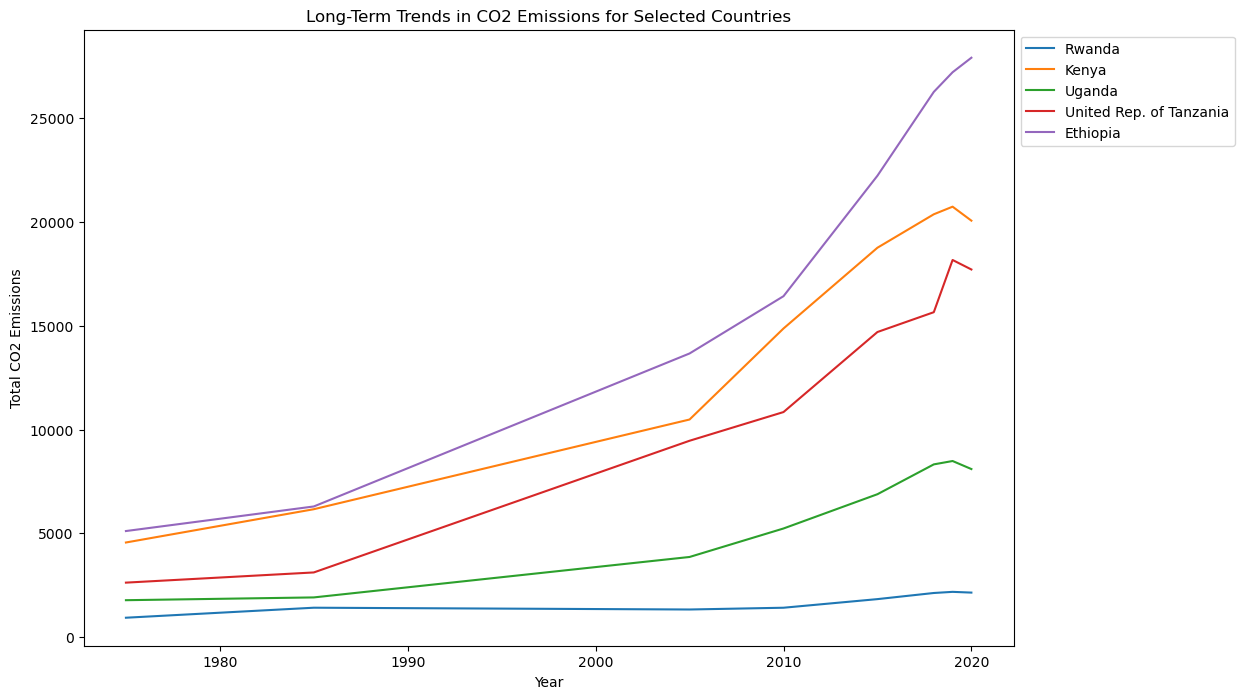

In [21]:
# E 12. What are the long-term trends or patterns in CO2 emissions for the countries with the highest CO2 emissions over the entire time period covered by the dataset?

# Check the data type of the 'Value' column
if data_cleaned['Value'].dtype == 'O':  # 'O' represents object (likely string) type
    # Convert 'Value' column to numeric (assuming it contains commas)
    data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'].str.replace(',', ''), errors='coerce')

# Group the data by country and year, summing CO2 emissions for each combination
country_emissions_over_time = data_cleaned.groupby(["Country", "Year"])["Value"].sum().reset_index()

# Plot long-term trends for the specified countries
plt.figure(figsize=(12, 8))
selected_countries = ["Rwanda", "Kenya", "Uganda", "United Rep. of Tanzania", "Ethiopia"]
for country in selected_countries:
    # Extract data for the current country
    country_data = country_emissions_over_time[country_emissions_over_time['Country'] == country]
    
    # Plot the data for the current country
    plt.plot(country_data['Year'], country_data['Value'], label=country)

# Add labels and title to the plot
plt.title("Long-Term Trends in CO2 Emissions for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Total CO2 Emissions")

# Add legend to identify countries
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

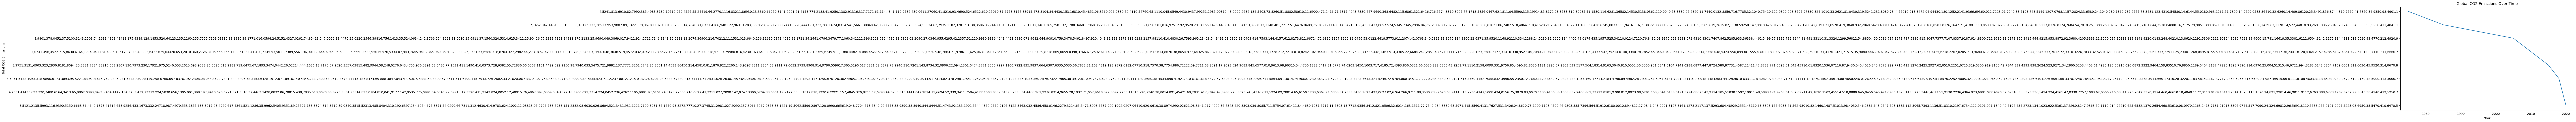

In [26]:
global_data = data.groupby('Year')['Value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', data=global_data)
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.show()


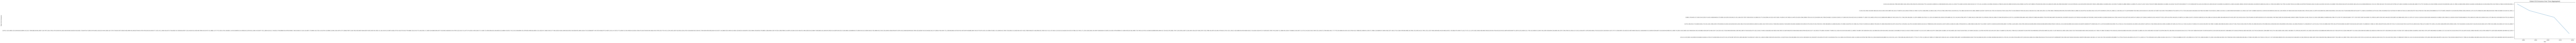

In [23]:
aggregated_data = data.groupby('Year')['Value'].sum().reset_index()

# Aggregate data over a larger time interval (e.g., every 5 years)
aggregated_data['Year'] = aggregated_data['Year'] // 5 * 5
aggregated_data = aggregated_data.groupby('Year')['Value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', data=aggregated_data)
plt.title('Global CO2 Emissions Over Time (Aggregated)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.show()


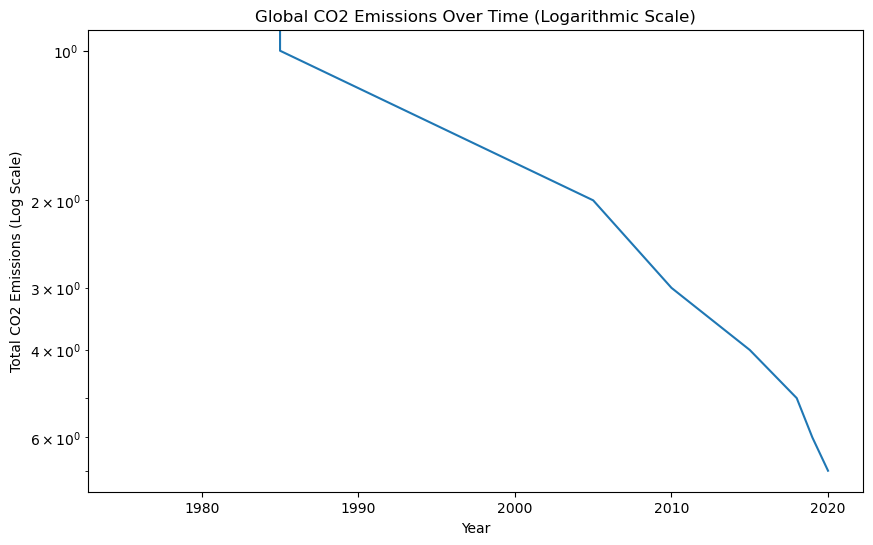

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', data=global_data)
plt.title('Global CO2 Emissions Over Time (Logarithmic Scale)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (Log Scale)')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()


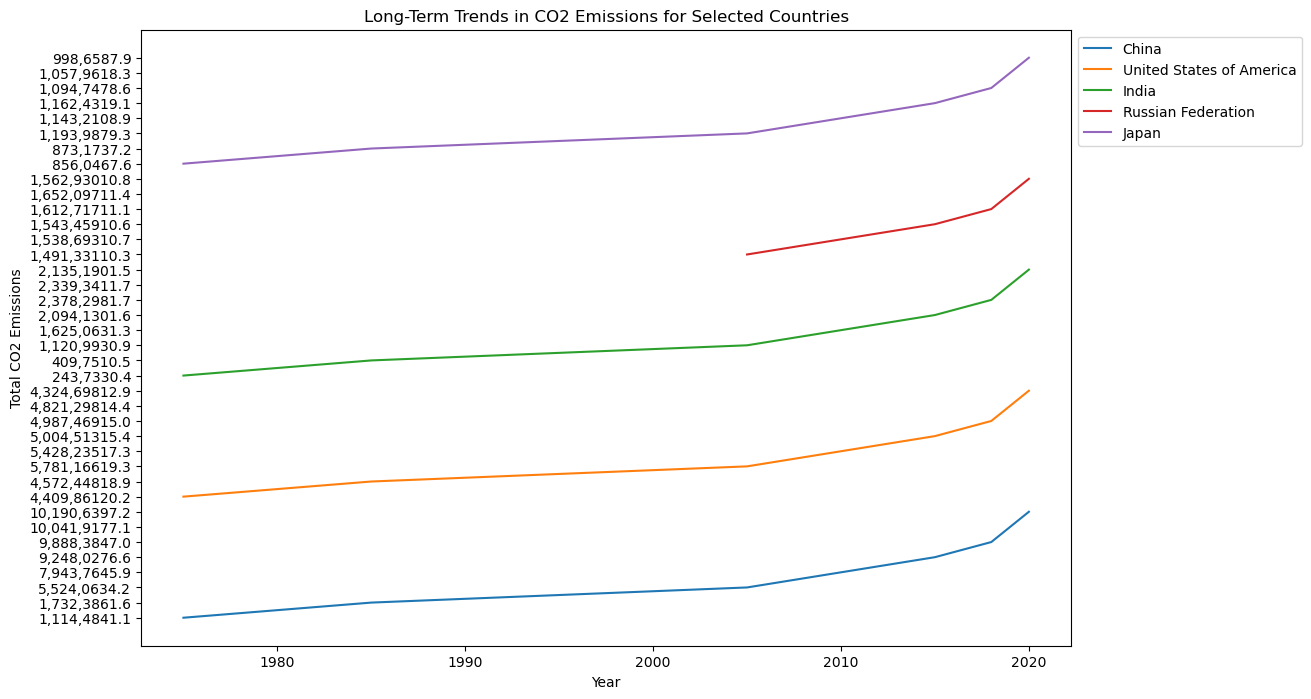

In [31]:
# Select specific countries for analysis
selected_countries = ["Rwanda", "Uganda", "Kenya"]
selected_countries = ["China", "United States of America", "India", "Russian Federation", "Japan"]

# Filter data for the selected countries
selected_countries_data = data[data["Country"].isin(selected_countries)]

# Group data by country and year, summing CO2 emissions for each combination
country_emissions_over_time = selected_countries_data.groupby(["Country", "Year"])["Value"].sum().reset_index()

# Plot long-term trends for the specified countries
plt.figure(figsize=(12, 8))
for country in selected_countries:
    # Extract data for the current country
    country_data = country_emissions_over_time[country_emissions_over_time["Country"] == country]

    # Plot the data for the current country
    plt.plot(country_data["Year"], country_data["Value"], label=country)

# Add labels and title to the plot
plt.title("Long-Term Trends in CO2 Emissions for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Total CO2 Emissions")

# Add legend to identify countries
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


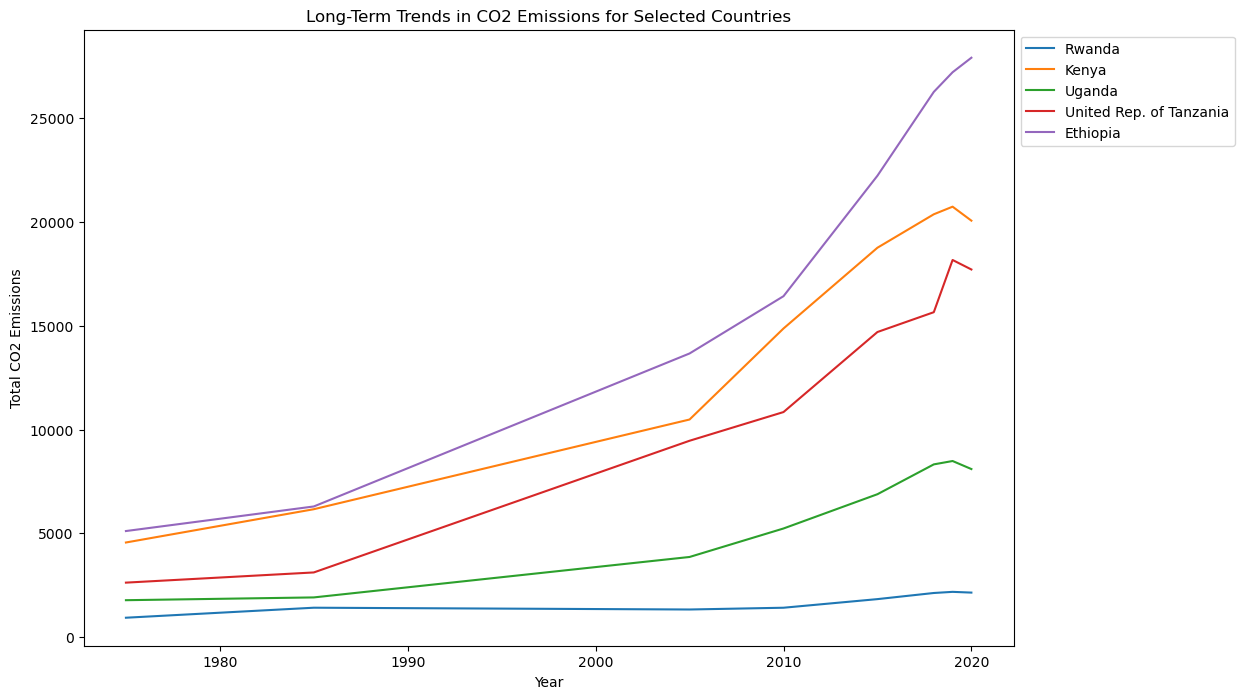

In [36]:
# Check the data type of the 'Value' column
if data_cleaned['Value'].dtype == 'O':  # 'O' represents object (likely string) type
    # Remove commas and convert 'Value' column to numeric
    data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'].str.replace(',', ''), errors='coerce')

# Group the data by country and year, summing CO2 emissions for each combination
country_emissions_over_time = data_cleaned.groupby(["Country", "Year"])["Value"].sum().reset_index()

# Plot long-term trends for the specified countries
plt.figure(figsize=(12, 8))
selected_countries = ["Rwanda", "Kenya", "Uganda", "United Rep. of Tanzania", "Ethiopia"]
for country in selected_countries:
    # Extract data for the current country
    country_data = country_emissions_over_time[country_emissions_over_time['Country'] == country]
    
    # Plot the data for the current country
    plt.plot(country_data['Year'], country_data['Value'], label=country)

# Add labels and title to the plot
plt.title("Long-Term Trends in CO2 Emissions for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Total CO2 Emissions")

# Add legend to identify countries
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


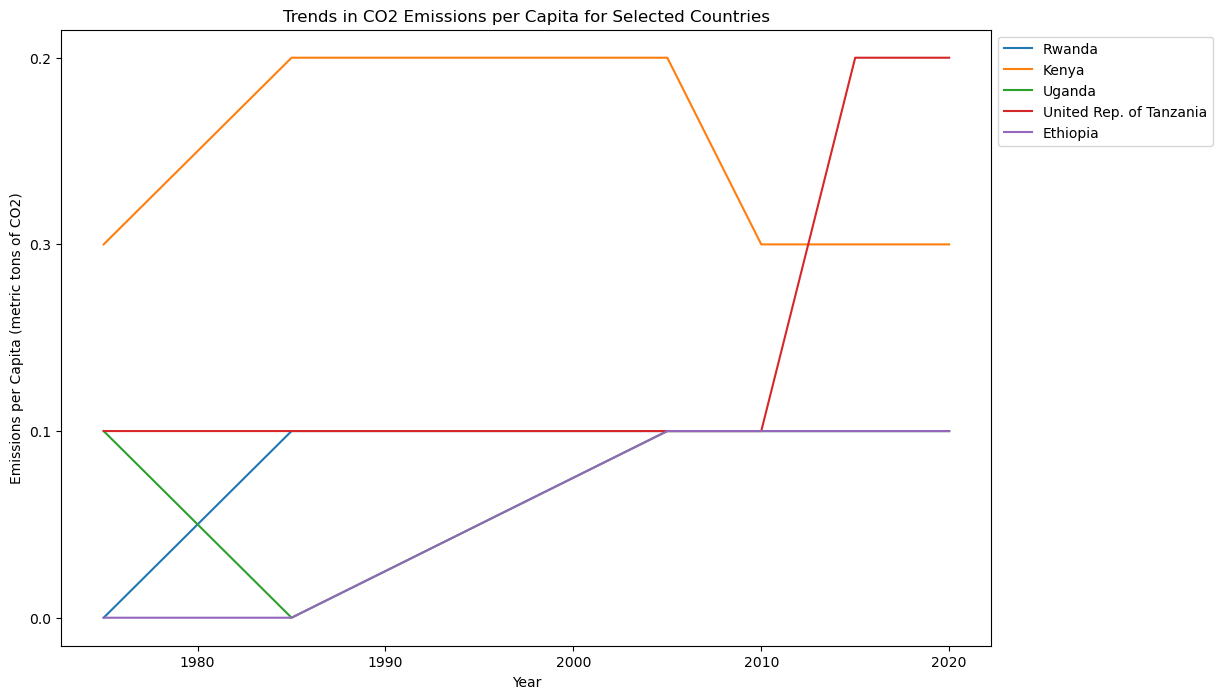

In [37]:
# Filter data for the specified series related to per capita emissions
per_capita_data = data[data['Series'] == 'Emissions per capita (metric tons of carbon dioxide)']

# Group data by country and year, summing per capita emissions for each combination
per_capita_over_time = per_capita_data.groupby(["Country", "Year"])["Value"].sum().reset_index()

# Plot trends for per capita emissions for the specified countries
plt.figure(figsize=(12, 8))
selected_countries = ["Rwanda", "Kenya", "Uganda", "United Rep. of Tanzania", "Ethiopia"]
for country in selected_countries:
    # Extract data for the current country
    country_data = per_capita_over_time[per_capita_over_time['Country'] == country]
    
    # Plot the data for the current country
    plt.plot(country_data['Year'], country_data['Value'], label=country)

# Add labels and title to the plot
plt.title("Trends in CO2 Emissions per Capita for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Emissions per Capita (metric tons of CO2)")

# Add legend to identify countries
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


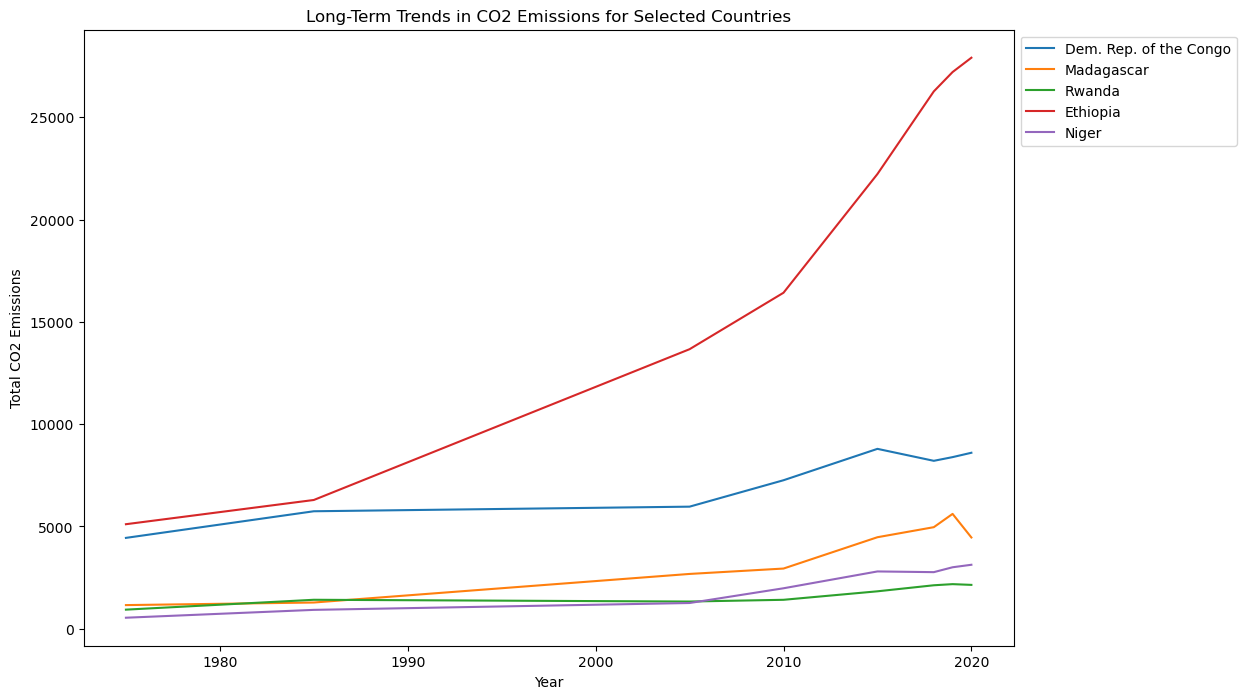

In [41]:
# Check the data type of the 'Value' column
if data_cleaned['Value'].dtype == 'O':  # 'O' represents object (likely string) type
    # Remove commas and convert 'Value' column to numeric
    data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'].str.replace(',', ''), errors='coerce')

# Group the data by country and year, summing CO2 emissions for each combination
country_emissions_over_time = data_cleaned.groupby(["Country", "Year"])["Value"].sum().reset_index()

# Plot long-term trends for the specified countries
plt.figure(figsize=(12, 8))
selected_countries = ["Dem. Rep. of the Congo", "Madagascar", "Rwanda", "Ethiopia", "Niger"]

for country in selected_countries:
    # Extract data for the current country
    country_data = country_emissions_over_time[country_emissions_over_time['Country'] == country]
    
    # Plot the data for the current country
    plt.plot(country_data['Year'], country_data['Value'], label=country)

# Add labels and title to the plot
plt.title("Long-Term Trends in CO2 Emissions for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Total CO2 Emissions")

# Add legend to identify countries
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


In [40]:
# 5. What are the top five countries or regions with the lowest total CO2 emissions in the most recent year available?

# Check the data type of the 'Value' column
if data_cleaned['Value'].dtype == 'O':  # 'O' stands for object, which is the data type for strings
    # Convert 'Value' column to numeric only if it contains strings
    data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'].str.replace(',', ''), errors='coerce')

# Find the most recent year in the dataset
latest_year = data_cleaned['Year'].max()

# Filter the dataset for the most recent year
latest_year_data = data_cleaned[data_cleaned['Year'] == latest_year]

# Sort the data by CO2 emissions in ascending order to get the lowest emissions first
lowest_emitting_countries = latest_year_data.sort_values(by='Value')

# Display the top five countries or regions with the lowest total CO2 emissions
top_lowest_emitting = lowest_emitting_countries[['Country', 'Value']].head(5)

# Print the result
print("Top five countries or regions with the lowest CO2 emissions in the most recent year:")
print(top_lowest_emitting)

Top five countries or regions with the lowest CO2 emissions in the most recent year:
                     Country  Value
551   Dem. Rep. of the Congo    0.0
1249              Madagascar    0.1
1739                  Rwanda    0.1
701                 Ethiopia    0.1
1479                   Niger    0.1


In [43]:
# Check the data type of the 'Value' column
if data_cleaned['Value'].dtype == 'O':
    # Convert 'Value' column to numeric only if it contains strings
    data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'].str.replace(',', ''), errors='coerce')

# Group the data by country and year, summing CO2 emissions for each combination
country_emissions = data_cleaned.groupby(['Country', 'Year'])['Value'].sum().reset_index()

# Sort the data by CO2 emissions in ascending order to get the lowest emissions first for each year
lowest_emitting_countries = country_emissions.sort_values(by=['Year', 'Value'])

# Display the top five countries or regions with the lowest total CO2 emissions for each year
top_lowest_emitting = lowest_emitting_countries.groupby('Year').head(5)

# Print the result
print("Top five countries or regions with the lowest CO2 emissions for each year:")
print(top_lowest_emitting[['Year', 'Country', 'Value']])


Top five countries or regions with the lowest CO2 emissions for each year:
     Year            Country   Value
397  1975          Gibraltar    65.1
641  1975          Mauritius   453.5
994  1975               Togo   458.1
335  1975           Eswatini   476.6
732  1975              Niger   541.1
316  1985  Equatorial Guinea    46.1
398  1985          Gibraltar    94.1
995  1985               Togo   480.1
642  1985          Mauritius   642.6
91   1985              Benin   763.1
399  2005          Gibraltar   424.3
323  2005            Eritrea   690.2
200  2005              Congo  1001.2
337  2005           Eswatini  1154.0
734  2005              Niger  1260.1
400  2010          Gibraltar   496.0
324  2010            Eritrea   620.2
338  2010           Eswatini   998.8
865  2010             Rwanda  1417.1
951  2010           Suriname  1763.3
401  2015          Gibraltar   613.3
325  2015            Eritrea   645.2
339  2015           Eswatini  1187.9
998  2015               Togo  1492.1


In [44]:
# Check the data type of the 'Value' column
if data_cleaned['Value'].dtype == 'O':
    # Convert 'Value' column to numeric only if it contains strings
    data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'].str.replace(',', ''), errors='coerce')

# Group the data by country and year, summing CO2 emissions for each combination
country_emissions = data_cleaned.groupby(['Country', 'Year'])['Value'].sum().reset_index()

# Find the most recent year in the dataset
latest_year = country_emissions['Year'].max()

# Filter the data for the most recent year
latest_year_data = country_emissions[country_emissions['Year'] == latest_year]

# Sort the data by CO2 emissions in ascending order to get the lowest emissions first for the most recent year
lowest_emitting_countries = latest_year_data.sort_values(by='Value')

# Display the top five countries or regions with the lowest total CO2 emissions for the most recent year
top_lowest_emitting = lowest_emitting_countries.head(5)

# Print the result
print(f"Top five countries or regions with the lowest CO2 emissions for the most recent year ({latest_year}):")
print(top_lowest_emitting[['Country', 'Value']])


Top five countries or regions with the lowest CO2 emissions for the most recent year (2020):
       Country   Value
404  Gibraltar   675.0
328    Eritrea   771.2
342   Eswatini  1299.0
460    Iceland  1477.9
640      Malta  1633.1
